In [28]:
#将猫狗分类的小型卷积神经网络实例化
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [29]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [30]:
#使用ImageDataGenerator从目录中读取图像
#ImageDataGenerator可以快速创建Python生成器，能够将硬盘上的图像文件自动转换为预处理好的张量批量
from keras.preprocessing.image import ImageDataGenerator

#将所有图像乘以1/255缩放
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'  #因为使用了binary_crossentropy损失，所以需要用二进制标签
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [32]:
#利用批量生成器拟合模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 50,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50#需要从验证生成器中抽取50个批次用于评估
)

#保存模型
model.save('model\cats_and_dogs_small_1.h5')

Epoch 1/30
50/50 [==============================] - 27s 545ms/step - loss: 0.6927 - acc: 0.5100 - val_loss: 0.6825 - val_acc: 0.5810
Epoch 2/30
50/50 [==============================] - 27s 538ms/step - loss: 0.6783 - acc: 0.5660 - val_loss: 0.6659 - val_acc: 0.6370
Epoch 3/30
50/50 [==============================] - 27s 538ms/step - loss: 0.6576 - acc: 0.6140 - val_loss: 0.6716 - val_acc: 0.5710
Epoch 4/30
50/50 [==============================] - 27s 538ms/step - loss: 0.6232 - acc: 0.6500 - val_loss: 0.6158 - val_acc: 0.6660
Epoch 5/30
50/50 [==============================] - 28s 569ms/step - loss: 0.5954 - acc: 0.6770 - val_loss: 0.6318 - val_acc: 0.6090
Epoch 6/30
50/50 [==============================] - 28s 551ms/step - loss: 0.5723 - acc: 0.6880 - val_loss: 0.6486 - val_acc: 0.6090
Epoch 7/30
50/50 [==============================] - 28s 551ms/step - loss: 0.5599 - acc: 0.7180 - val_loss: 0.6110 - val_acc: 0.6700
Epoch 8/30
50/50 [==============================] - 28s 553ms/step - 

In [33]:
#向模型中添加一个Dropout层，添加到密集连接分类器之前
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [34]:
from keras.models import load_model
model = load_model('model\cats_and_dogs_small_1.h5') 

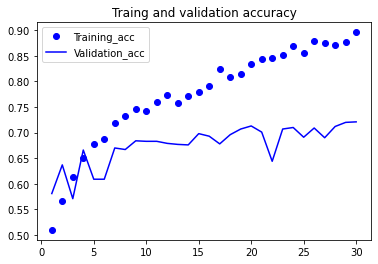

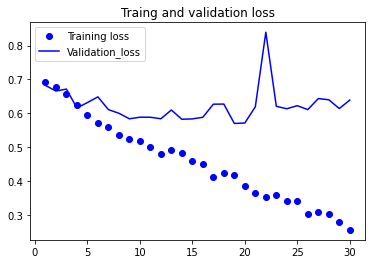

In [35]:
#绘制损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training_acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title('Traing and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation_loss')
plt.title('Traing and validation loss')
plt.legend()

plt.show()

In [36]:
#因为数据样本较少，容易过拟合，因此我们使用数据增强来减少过拟合

#利用ImageDataGenerator来设置数据增强
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


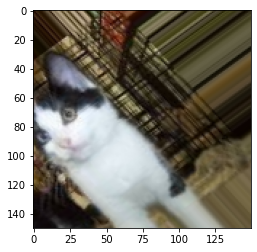

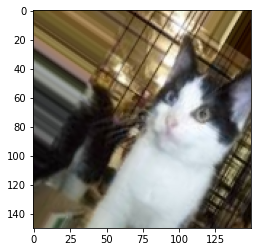

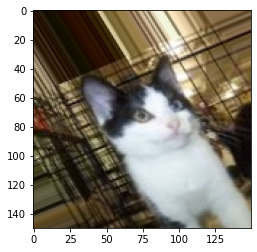

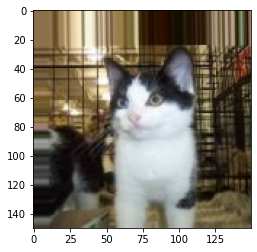

In [37]:
#显示几个随机增强后的训练图像
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
# ['cats_and_dogs_small\\train\\cats\\cat.0.jpg','cats_and_dogs_small\\train\\cats\\cat.1.jpg',...]

img_path = fnames[3]#选择一张图像进行增强 
# 'cats_and_dogs_small\\train\\cats\\cat.3.jpg'

img = image.load_img(img_path,target_size=(150,150))#读取图像并调整大小

x = image.img_to_array(img) # ==> array(150,150,3)

x = x.reshape((1,)+x.shape) # ==> array(1,150,150,3)
#x的秩必须为4，不够需要加一维 

i = 0
for batch in datagen.flow(x,batch_size=1): 
    plt.figure(i)
    implot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0: #生成随机变换后的图像批量。循环是无限的，因此你需要在某个时刻终止循环
        break #生成4张图之后就终止
        
plt.show()



In [38]:
#向模型中添加一个Dropout层，添加到密集连接分类器之前
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [39]:
#利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'  #因为使用了binary_crossentropy损失，所以需要用二进制标签
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 50,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50#需要从验证生成器中抽取50个批次用于评估
)

model.save('model\cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
50/50 [==============================] - 29s 585ms/step - loss: 0.6941 - acc: 0.5070 - val_loss: 0.6884 - val_acc: 0.5140
Epoch 2/30
50/50 [==============================] - 30s 598ms/step - loss: 0.6914 - acc: 0.5210 - val_loss: 0.6842 - val_acc: 0.5030
Epoch 3/30
50/50 [==============================] - 28833s 577s/step - loss: 0.6846 - acc: 0.5520 - val_loss: 0.6772 - val_acc: 0.5940
Epoch 4/30
50/50 [==============================] - 30s 607ms/step - loss: 0.6804 - acc: 0.5860 - val_loss: 0.6685 - val_acc: 0.5750
Epoch 5/30
50/50 [==============================] - 29s 580ms/step - loss: 0.6755 - acc: 0.5760 - val_loss: 0.6679 - val_acc: 0.5770
Epoch 6/30
50/50 [==============================] - 29s 579ms/step - loss: 0.6631 - acc: 0.6020 - val_loss: 0.6613 - val_acc: 0.5920
Epoch 7/30
50/50 [==============================] - 29s 582ms/step - loss: 0.6614 - acc: 0.6060 - val_loss: 0.6408 -

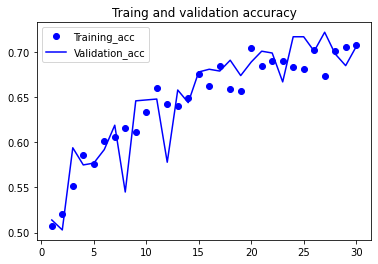

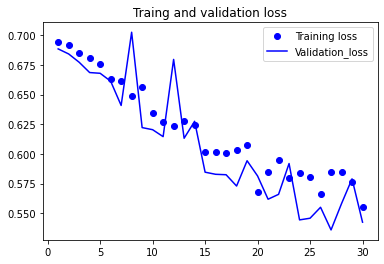

In [40]:
#绘制损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training_acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title('Traing and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation_loss')
plt.title('Traing and validation loss')
plt.legend()

plt.show()